In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection

In [2]:
data = pd.read_csv('Data/Human.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
avg_age = data['Age'].mean()
print(f"Average age of the employees is: {avg_age.round(2)} years")

Average age of the employees is: 36.92 years


In [7]:
data['Attrition'] = data['Attrition'].apply(lambda x:1 if x=='Yes' else 0)
data['OverTime'] = data['OverTime'].apply(lambda x:1 if x=='Yes' else 0)

In [8]:
data['Over18'] = data['Over18'].apply(lambda x:1 if x=='Y' else 0)

In [9]:
data.drop(['EmployeeCount', 'StandardHours'], axis=1, inplace=True)

In [10]:
data.drop(['EmployeeNumber'], axis=1, inplace=True)

In [11]:
# Let's see how many employees left the company!
left_df = data[data['Attrition'] == 1]
stayed_df = data[data['Attrition'] == 0]

In [12]:
print(f"Total = {len(data)}")
print(f"Number of employees who left = {len(left_df)}")
print(f"Percentage of employees who left = {round(100.0 * len(left_df) / len(data), 2)}%")
print(f"Number of employees who stayed = {len(stayed_df)}")
print(f"Percentage of employees who stayed = {round(100.0 * len(stayed_df) / len(data), 2)}%")


Total = 1470
Number of employees who left = 237
Percentage of employees who left = 16.12%
Number of employees who stayed = 1233
Percentage of employees who stayed = 83.88%


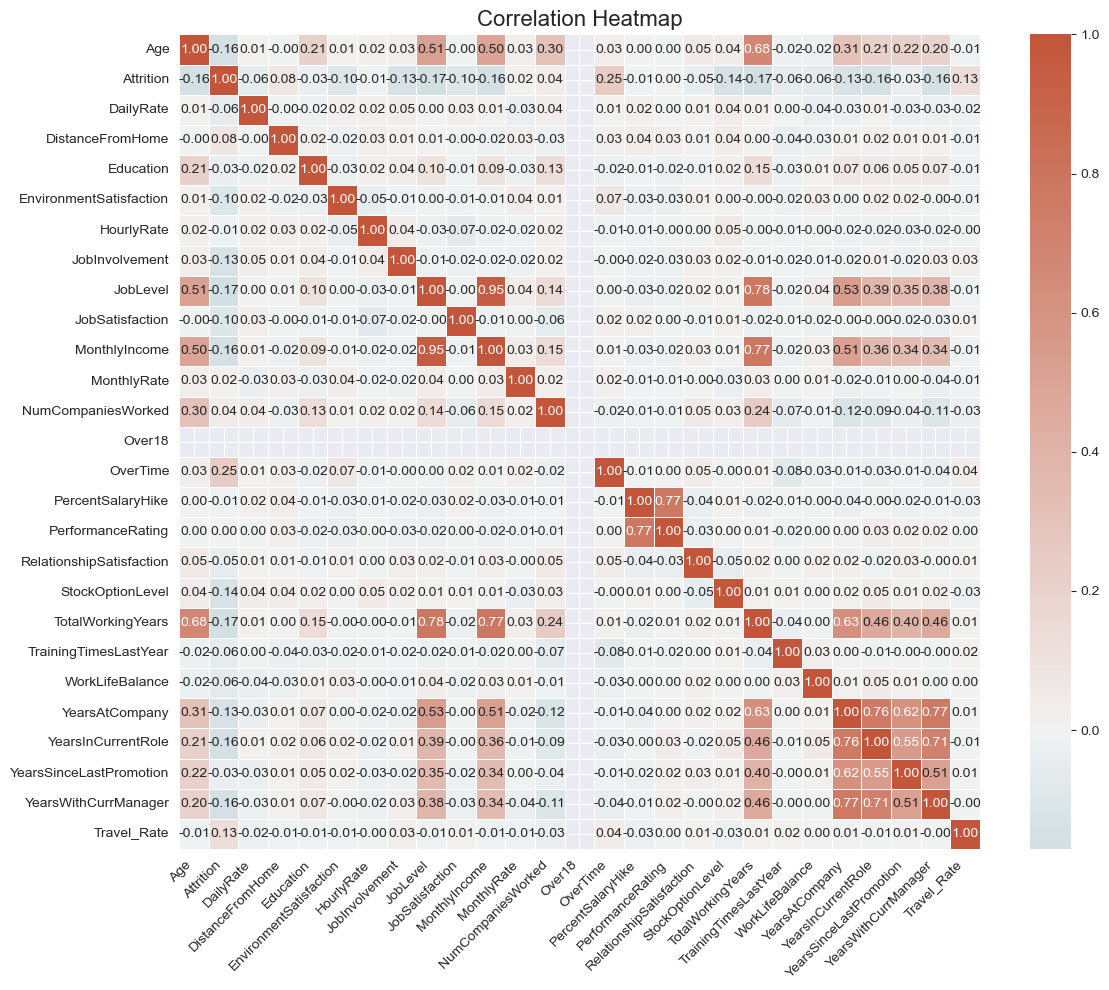

In [13]:
# Create a dictionary for mapping
convert_to_numerical = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}

# Map 'BusinessTravel' to numerical values
data['Travel_Rate'] = data['BusinessTravel'].map(convert_to_numerical)

# Check for non-numeric columns and exclude them
numeric_columns = data.select_dtypes(include=['number']).columns
data_numeric = data[numeric_columns]

# Calculate the correlation matrix
correlation = data_numeric.corr()

# Set up the plot
plt.figure(figsize=(12, 10))

# Create a custom color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create a heatmap with customizations
heatmap = sns.heatmap(correlation, annot=True, fmt='.2f', cmap=cmap, center=0, linewidths=0.5)

# Customize the plot further
plt.title('Correlation Heatmap', fontsize=16)

# Separate and rotate x and y labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=10)

plt.tight_layout()

# Show the heatmap
plt.show()

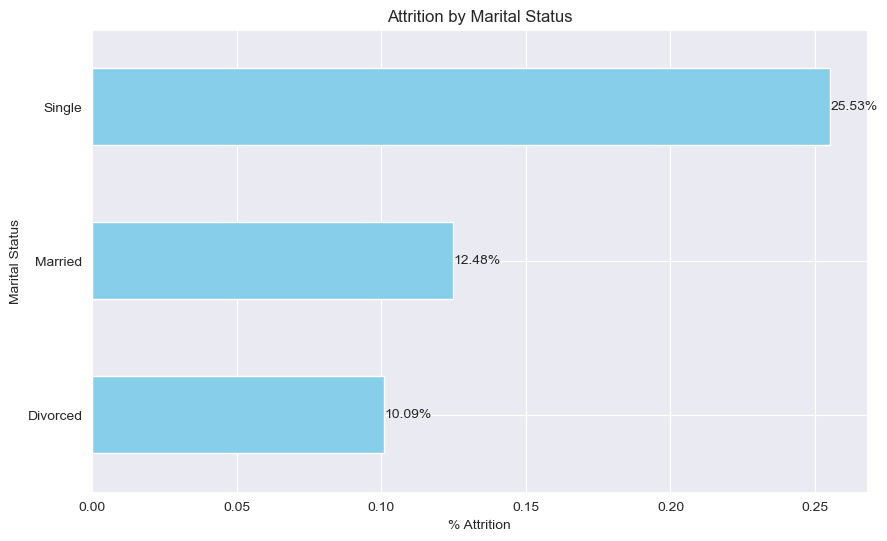

In [14]:
# Group by 'MaritalStatus' and calculate the mean of 'Attrition'
marital_status_attrition = data.groupby('MaritalStatus')['Attrition'].mean()

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
marital_status_attrition.plot(kind='barh', color='skyblue')

# Set plot labels and title
plt.xlabel('% Attrition')
plt.ylabel('Marital Status')
plt.title('Attrition by Marital Status')

# Add values next to the bars
for index, value in enumerate(marital_status_attrition):
    plt.text(value, index, f'{value:.2%}', va='center')

# Show the plot
plt.show()

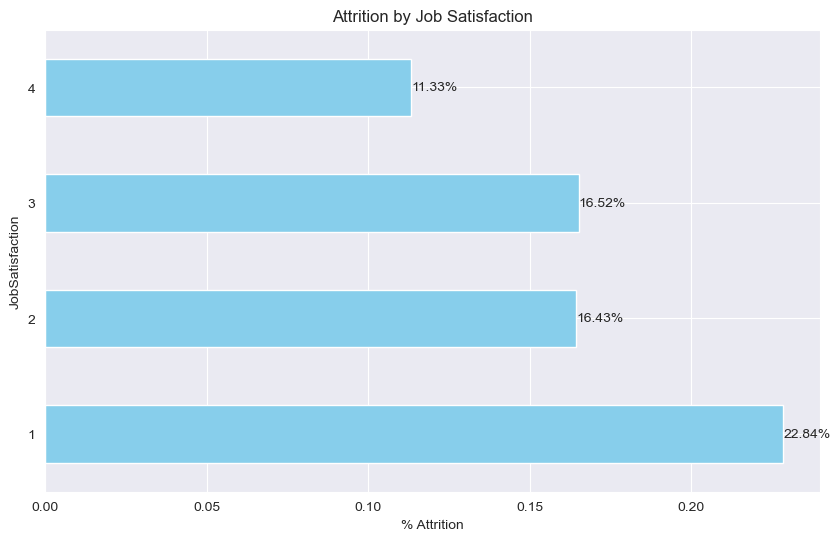

In [15]:
# Create a function for creating informative bar plots
def create_informative_bar_plot(data, group_column, title, xlabel):
    group_attrition = data.groupby(group_column)['Attrition'].mean()

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 6))
    group_attrition.plot(kind='barh', color='skyblue')

    # Set plot labels and title
    plt.xlabel(xlabel)
    plt.ylabel(group_column)
    plt.title(title)

    # Add percentage values next to the bars
    for index, value in enumerate(group_attrition):
        plt.text(value, index, f'{value:.2%}', va='center')

    # Show the plot
    plt.show()

# Example usage for 'JobSatisfaction'
create_informative_bar_plot(data, 'JobSatisfaction', 'Attrition by Job Satisfaction', '% Attrition')

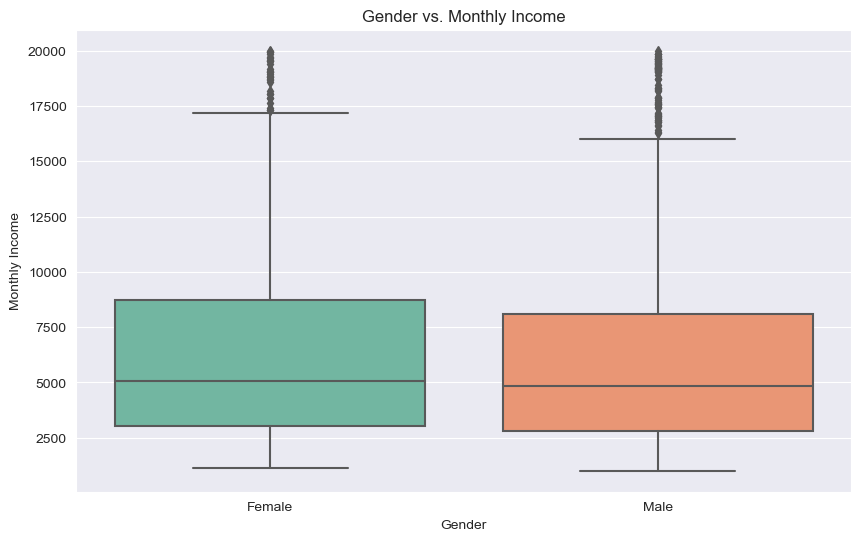

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='MonthlyIncome', data=data, palette='Set2')


plt.xlabel('Gender')
plt.ylabel('Monthly Income')
plt.title('Gender vs. Monthly Income')


plt.show()

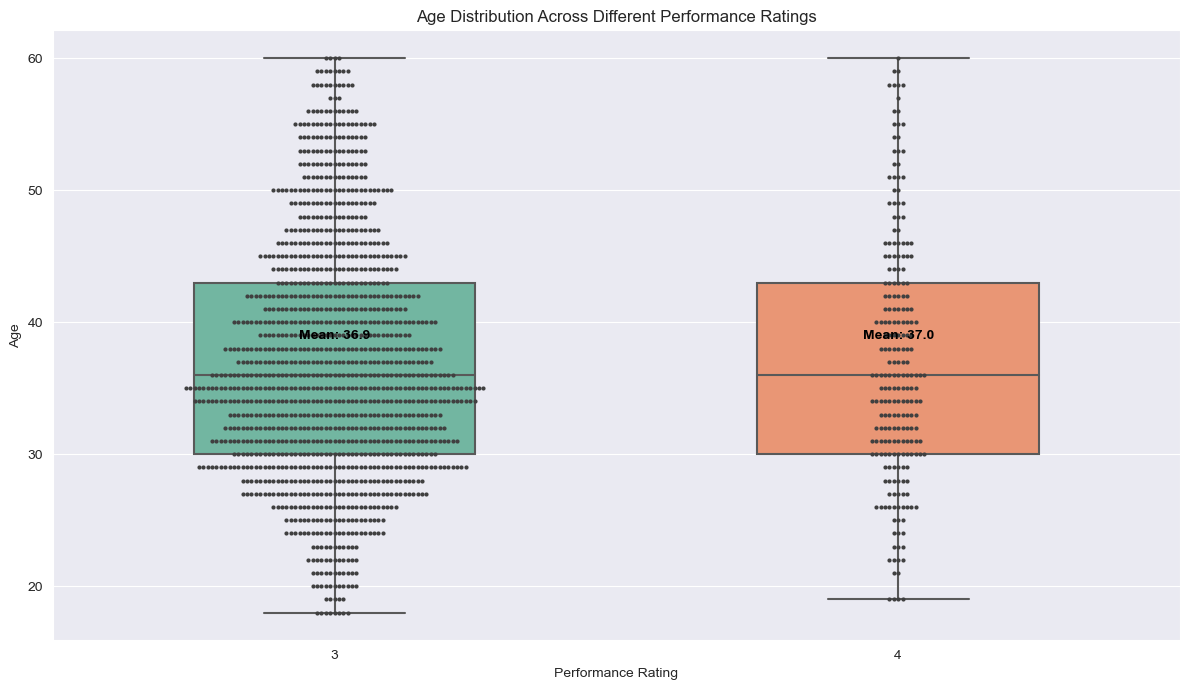

In [17]:
plt.figure(figsize=(12, 7))

# Ordered boxplot
order = sorted(data['PerformanceRating'].unique())
sns.boxplot(x='PerformanceRating', y='Age', data=data, palette='Set2', order=order, width=0.5)

# Overlay with swarm plot
sns.swarmplot(x='PerformanceRating', y='Age', data=data, color='0.25', size=3, order=order)

# Calculate mean age for each performance rating and annotate
means = data.groupby('PerformanceRating')['Age'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 2, f"Mean: {mean:.1f}", ha='center', va='center', fontweight='bold', color='black')

# Title and labels
plt.title('Age Distribution Across Different Performance Ratings')
plt.xlabel('Performance Rating')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

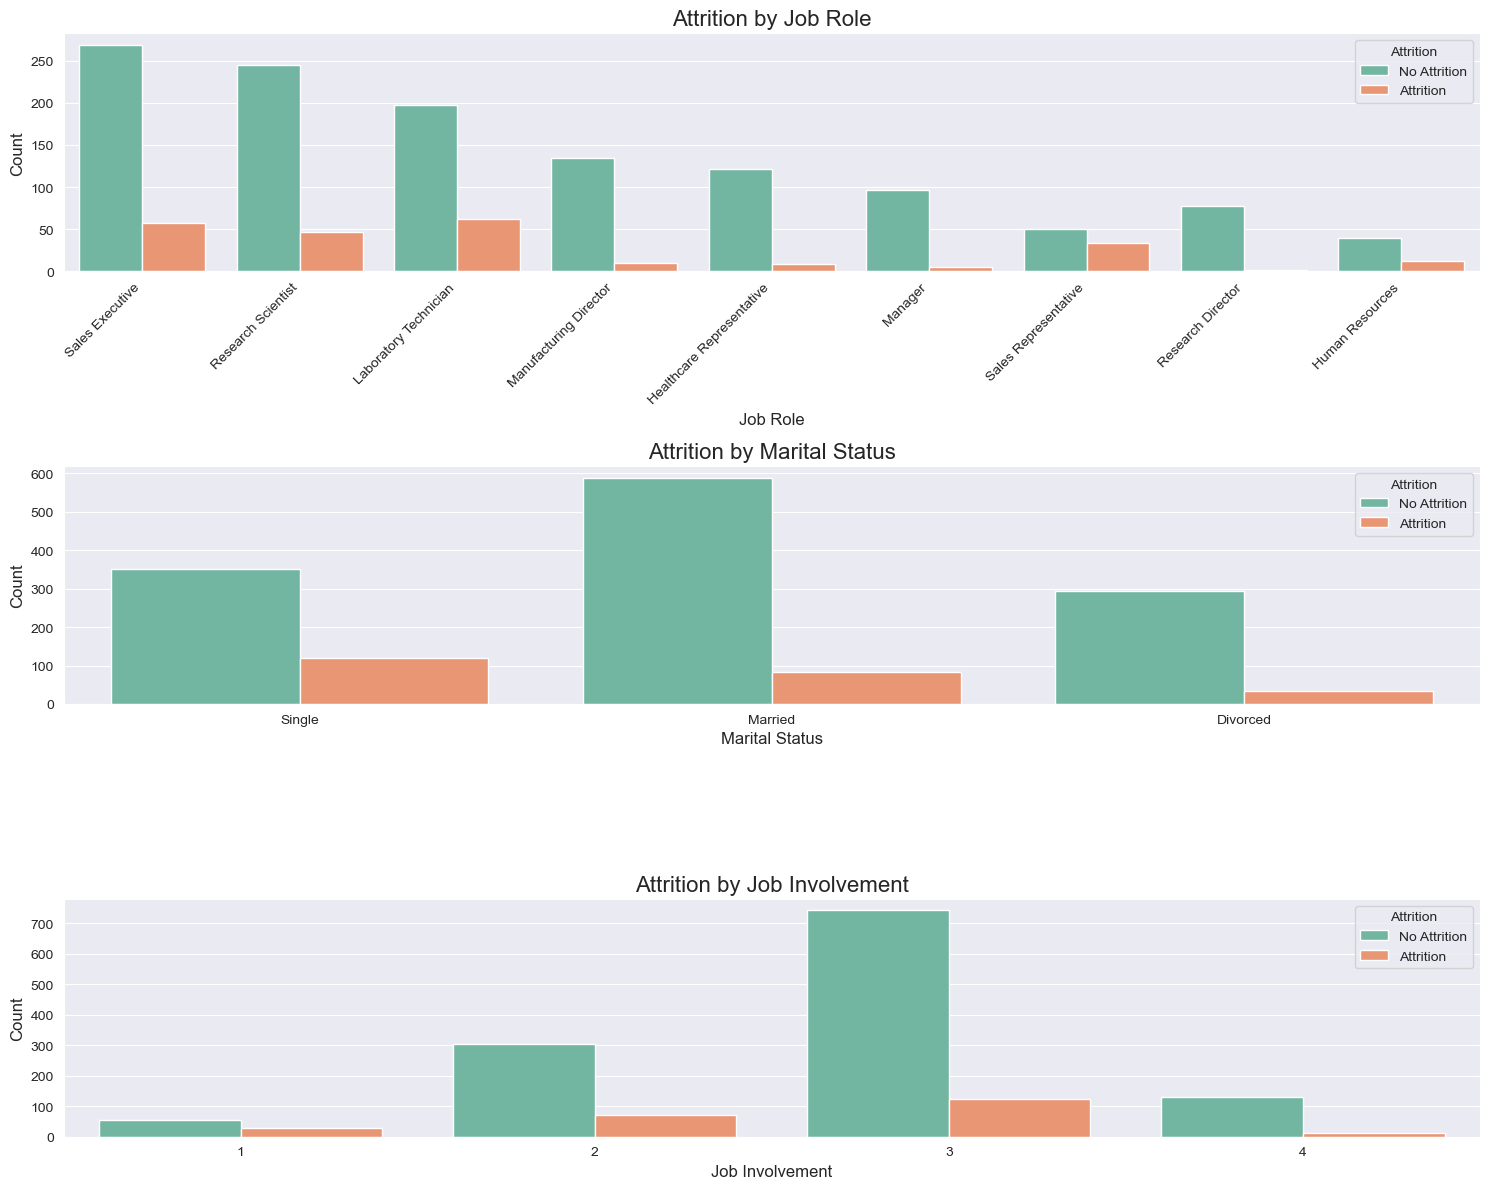

In [18]:
# Set the overall figure size
plt.figure(figsize=(15, 12))

# Define a color palette
palette = sns.color_palette("Set2")

# Subplot 1: Job Role vs. Attrition
plt.subplot(311)
sns.countplot(x='JobRole', hue='Attrition', data=data, palette=palette)
plt.title('Attrition by Job Role', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Attrition', labels=['No Attrition', 'Attrition'], fontsize=10)

# Subplot 2: Marital Status vs. Attrition
plt.subplot(312)
sns.countplot(x='MaritalStatus', hue='Attrition', data=data, palette=palette)
plt.title('Attrition by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Attrition', labels=['No Attrition', 'Attrition'], fontsize=10)

# Subplot 3: Job Involvement vs. Attrition
plt.subplot(313)
sns.countplot(x='JobInvolvement', hue='Attrition', data=data, palette=palette)
plt.title('Attrition by Job Involvement', fontsize=16)
plt.xlabel('Job Involvement', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Attrition', labels=['No Attrition', 'Attrition'], fontsize=10)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

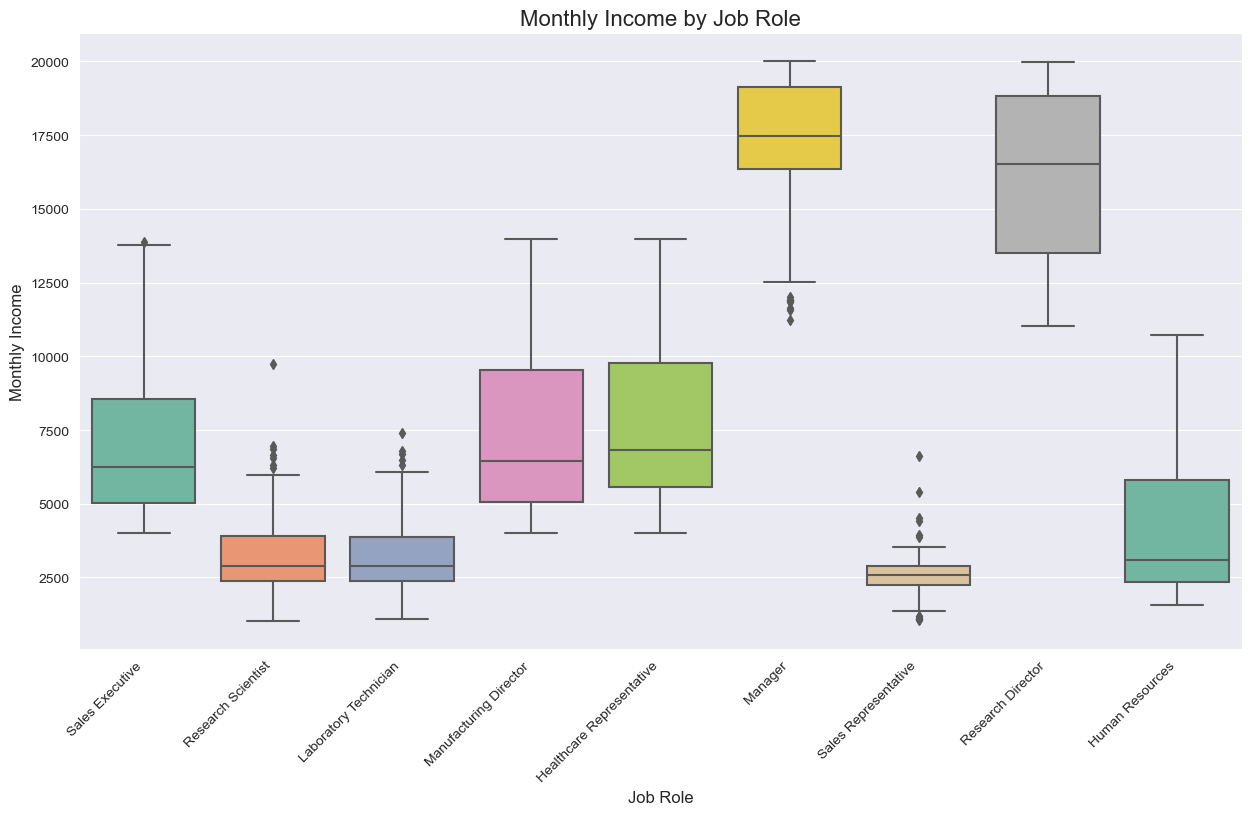

In [19]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=data, palette='Set2')
plt.title('Monthly Income by Job Role', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In [93]:
x_cat = data[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
x_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [94]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()
x_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [22]:
x_cat.shape

(1470, 26)

In [23]:
# convert x_cat to a dataframe
x_cat = pd.DataFrame(x_cat)

In [24]:
x_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [30]:
x_numerical = data[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
                    'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
                    'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
                    'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                    'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                    'YearsWithCurrManager']]

In [31]:
x_all = pd.concat([x_cat, x_numerical], axis=1)

In [32]:
x_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [36]:
from sklearn.preprocessing import MinMaxScaler

# Convert feature names to strings
x_all.columns = x_all.columns.astype(str)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the data
x_scaled = scaler.fit_transform(x_all)

In [39]:
y = data['Attrition']

In [54]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [55]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_scaled, y, test_size=0.2, random_state=7)

In [56]:
x_train.shape

(1176, 50)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [97]:
model = LogisticRegression()

In [98]:
model.fit(x_train, y_train)

LogisticRegression()

In [103]:
# Predict on the test set
y_pred = model.predict(x_test)
print(f"Accuracy of logistic regression model is: {accuracy_score(y_pred, y_test):.3f}")

Accuracy of logistic regression model is: 0.884


In [100]:
from sklearn.metrics import confusion_matrix, classification_report

In [102]:
print(f"The accuracy of the model is: {model.score(x_test, y_test)}")
print(f"The confusion matrix is: \n {confusion_matrix(y_test, y_pred)}")

The accuracy of the model is: 0.8843537414965986
The confusion matrix is: 
 [[242   9]
 [ 25  18]]


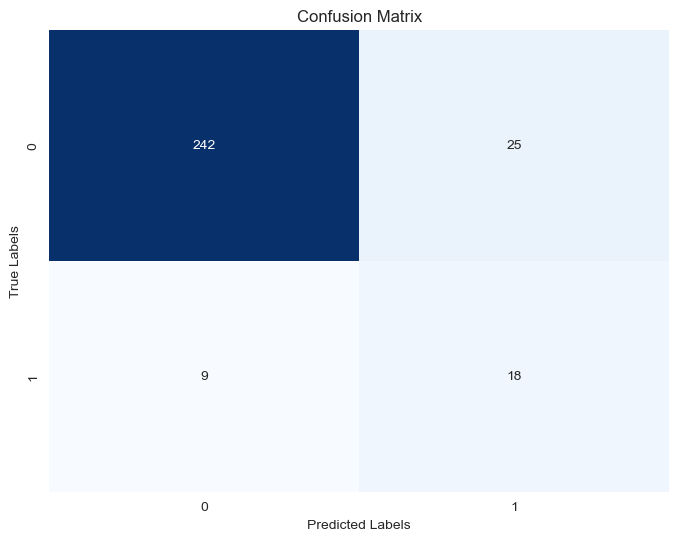

In [111]:
conf_mat = confusion_matrix(y_pred, y_test)

# Create a figure and axes for the plot
plt.figure(figsize=(8, 6))

# Create a heatmap with labels, count, and percentage annotations
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels to the axes
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Add a title
plt.title("Confusion Matrix")

# Show the plot
plt.show()

In [112]:
print(f"The classification report is as follows: \n {classification_report(y_test, y_pred)}")

The classification report is as follows: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       251
           1       0.67      0.42      0.51        43

    accuracy                           0.88       294
   macro avg       0.79      0.69      0.72       294
weighted avg       0.87      0.88      0.87       294


In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
model = RandomForestClassifier()

In [115]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [116]:
y_pred = model.predict(x_test)
print(f"Accuracy of random forest model is: {accuracy_score(y_pred, y_test):.3f}")

Accuracy of random forest model is: 0.857


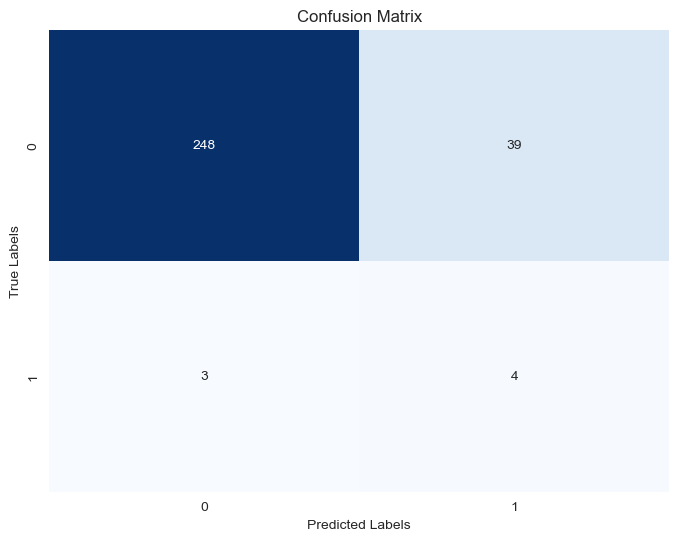

In [119]:
conf_mat = confusion_matrix(y_pred, y_test)

# Create a figure and axes for the plot
plt.figure(figsize=(8, 6))

# Create a heatmap with labels, count, and percentage annotations
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels to the axes
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Add a title
plt.title("Confusion Matrix")

# Show the plot
plt.show()

In [120]:
print(f"The classification report is as follows: \n {classification_report(y_test, y_pred)}")

The classification report is as follows: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       251
           1       0.57      0.09      0.16        43

    accuracy                           0.86       294
   macro avg       0.72      0.54      0.54       294
weighted avg       0.82      0.86      0.81       294


In [121]:
# improve the recall value
model = RandomForestClassifier(class_weight='balanced')

## Train and evaluate the model a deep learning model

In [129]:
import tensorflow as tf

In [132]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [136]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 500)               25500     
                                                                 
 dense_4 (Dense)             (None, 500)               250500    
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dense_6 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527001 (2.01 MB)
Trainable params: 527001 (2.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [139]:
epoch_history = model.fit(x_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
24/24 [==============================] - 0s 7ms/step - loss: 1.0353e-07 - accuracy: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 1.0103e-07 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 9.8894e-08 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 6ms/step - loss: 9.6432e-08 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 9.4323e-08 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 9.2131e-08 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 8.9711e-08 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 6ms/step - loss: 8.7626e-08 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 6ms/step - loss: 8.5963e-08 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 6ms/step - loss:

In [142]:
y_pred = model.predict(x_test)
y_pred_rounded = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_rounded)
print(f"Accuracy of deep learning model is: {accuracy:.3f}")

10/10 [==============================] - 0s 2ms/step
Accuracy of deep learning model is: 0.833


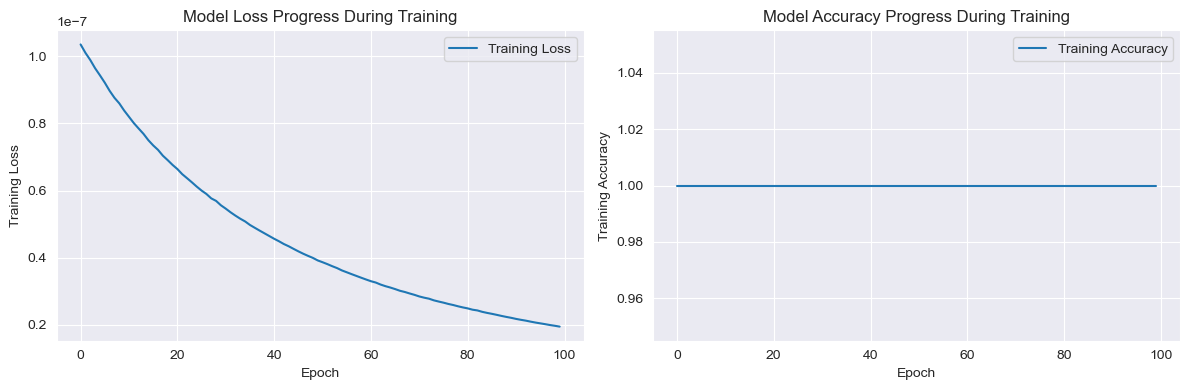

In [146]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training loss in the first subplot
axs[0].plot(epoch_history.history['loss'])
axs[0].set_title('Model Loss Progress During Training')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Training Loss')
axs[0].legend(['Training Loss'])

# Plot the training accuracy in the second subplot
axs[1].plot(epoch_history.history['accuracy'])
axs[1].set_title('Model Accuracy Progress During Training')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Training Accuracy')
axs[1].legend(['Training Accuracy'])

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with both subplots
plt.show()

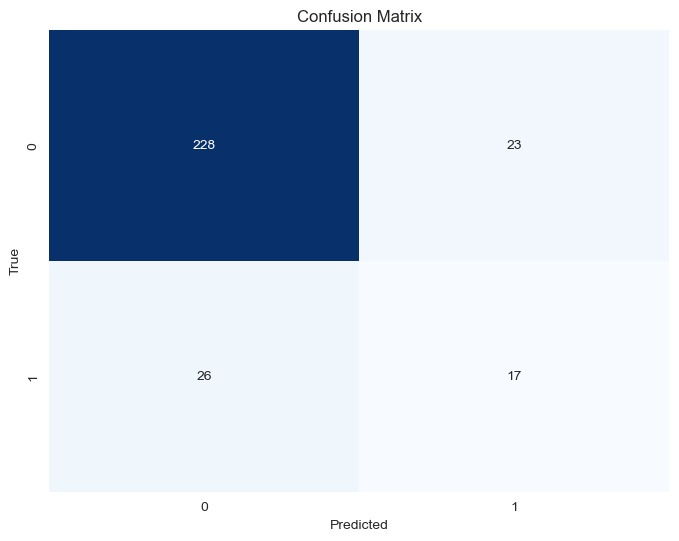

In [153]:
y_pred_binary = (y_pred >= 0.5).astype(int)

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_binary)

# Create a figure and set the figure size
plt.figure(figsize=(8, 6))

# Create a heatmap with annotations and a different colormap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Display the plot
plt.show()